# Métodos iterativos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## Método de Euler

- $y_{i+1} = y_{i}+ hf(t_{i},y_{i})$

- $\tau=\frac{h}{2}y''(\xi)$



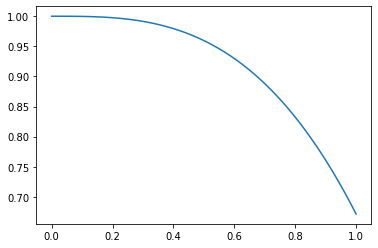

In [28]:
def definidor(f):
    t = sp.symbols('t')
    y = sp.symbols('y')
    F = sp.lambdify((t,y),f)
    return(F)

#Defino el método, escribiendo la F como una string
def euler(F,y0,t0,T,N):
    f = definidor(F)
    h = (T-t0)/N
    t = np.linspace(t0,T,N+1)
    y = np.zeros(N+1)
    y[0] = y0
        
    for j in range(0,N):
        y[j+1]=y[j]+h*f(t[j],y[j])
    return([t,y])

t, y = euler('-t**2',1,0,1,100)
plt.plot(t,y)

## Método de Taylor

- $y_{i+1}=y_{i}+hf(t_{i},y_{i})+\frac{h^{2}}{2}\left[f_{t}(t_{i},y_{i})+f_{y}(t_{i},y_{i})f(t_{i},y_{i})\right]$
- $\tau=\frac{h^{2}}{6}y'''({\xi)}$

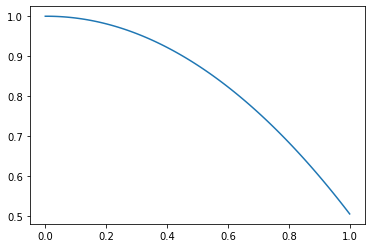

In [31]:
def definidor(f):
    t = sp.symbols('t')
    y = sp.symbols('y')
    f_t = sp.diff(f,t)
    f_y = sp.diff(f,y)
    
    F = sp.lambdify((t,y),f)
    F_t = sp.lambdify((t,y),f_t)
    F_y = sp.lambdify((t,y),f_y)
    return(F, F_t, F_y)

#Defino el método, escribiendo la F como una string
def taylor(F,y0,t0,T,N):
    f, f_t, f_y = definidor(F)
    h = (T-t0)/N
    t = np.linspace(t0,T,N+1)
    y = np.zeros(N+1)
    y[0] = y0
        
    for j in range(0,N):
        y[j+1]=y[j]+(h/2)*(f_t(t[j],y[j])+f_y(t[j],y[j]))
    return([t,y])

t, y = taylor('-t**2',1,0,1,100)
plt.plot(t,y)

## RK-4

- $y_{i+1} = y_{i}+\frac{h}{6}\left[K_{1}+2K_{2}+2K_{3}+K_{4}\right]$
- $K_{1}=f(t_{i},y_{i}),K_{2}=f(t_{i}+\frac{h}{2},y_{i}+\frac{h}{2}K_{1}),K_{3}=f(t_{i}+\frac{h}{2},y_{i}+\frac{h}{2}K_{2}),K_{4}=f(t_{i}+h,y_{i}+hK_{3})$

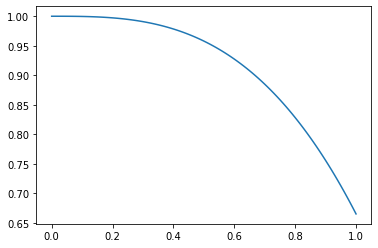

In [33]:
def definidor(f):
    t = sp.symbols('t')
    y = sp.symbols('y')
    F = sp.lambdify((t,y),f)
    return(F)

#Defino el método, escribiendo la F como una string
def RK4(F,y0,t0,T,N):
    f = definidor(F)
    h = (T-t0)/N
    t = np.linspace(t0,T,N+1)
    y = np.zeros(N+1)
    y[0] = y0
        
    for j in range(0,N):
        K1 = f(t[j],y[j])
        K2 = f(t[j]+h/2,y[j]+(h/2)*K1)
        K3 = f(t[j]+h/2,y[j]+(h/2)*K2)
        K4 = K2 = f(t[j]+h,y[j]+h*K3)
        y[j+1] = y[j] +(h/6)*(K1+2*K2+2*K3+K4)
    return([t,y])

t, y = RK4('-t**2',1,0,1,100)
plt.plot(t,y)